In [1]:
from lib.utils.train_utils import *
from lib.dataset.dataloader import WindowDataset
from lib.utils.variables import *

In [2]:
dataset = WindowDataset(data_type='seismic', split="validate", final=True, frequency_input=True)

{'total': 12470, 'noise': 0.5817963111467522, 'avalanche': 0.1070569366479551, 'earthquake': 0.3111467522052927}


In [7]:
k = np.random.randint(0, len(dataset))
sample = dataset.__getitem__(k)

seismic_timeseries = sample['temporal input'].unsqueeze(0)
frequency_spectrum = sample['spectral input'].unsqueeze(0)

label_map = {0: 'Noise', 1: 'Avalanche', 2: 'Earthquake'}
print(label_map[sample['class_label'].item()] + ' Sample')

Avalanche Sample


In [9]:
model_name = 'tae'
model = get_model(model_name=model_name)

input = {
    'temporal input': seismic_timeseries,
    'spectral input': frequency_spectrum
}
output, features, _ = model(input)

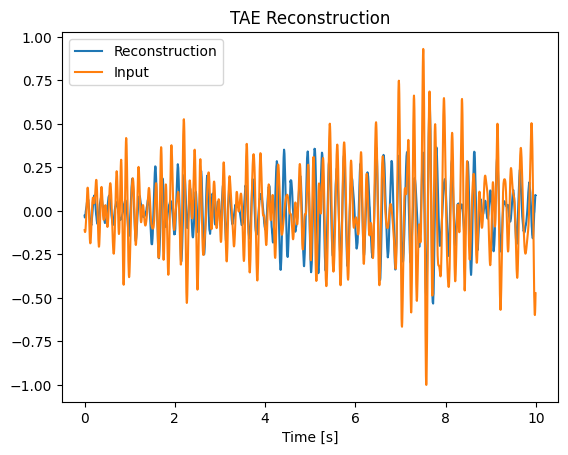

In [10]:
reconstructed_signal = output.detach().numpy()[0, 0, :]

if model_name == 'sae':
    title = 'SAE Reconstruction'
    target = input['spectral input'].numpy()[0, 0, :]
    x = [i/10 for i in range(target.shape[0])]
    xlabel = 'Frequency [Hz]'
elif model_name == 'tae':
    title = 'TAE Reconstruction'
    target = input['temporal input'].numpy()[0, 0, :]
    x = [i/200 for i in range(target.shape[0])]
    xlabel = 'Time [s]'
else:
    title = ''
    target = None
    x = None
    xlabel = ''

plt.plot(x, reconstructed_signal, label='Reconstruction')
plt.plot(x, target, label='Input')
plt.title(title)
plt.xlabel(xlabel)
plt.legend()
plt.show()